In [635]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
import matplotlib.pyplot as plt
from collections import Counter

In [636]:
data = pd.read_csv('movie_bd_v5.csv', encoding = 'utf-8') # iso-8859-1 utf-8 might be useful

In [637]:
data.describe() # A quick look at the typial statistical data.

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


In [638]:
data.info() # A quick look at the extended info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


# Предобработка

In [639]:
answers = {} # Dictionary for the answers.

# The time given in the dataset is in string format. So we change it to the datetime format as %Y-%m-%d
data['release_date'] = pd.to_datetime(data['release_date'])

# Compare unique inputs with the length of dataset. OK!
len(data['imdb_id'].unique()) == len(data)

# We include profit table in our dataset.
data['profit'] = data['revenue']- data['budget']

# Check errors. There are weird symbols in the database.
# To search for possible errors, we use:
# data[data.tagline.str.contains("Ã", na = False)]

# Then we can apply.
#data = data.apply(lambda x: x.astype(str).str.replace("â€˜", "‘")) # left single quote
#data = data.apply(lambda x: x.astype(str).str.replace("â€™", "’")) # right single quote
#data = data.apply(lambda x: x.astype(str).str.replace("â€œ", "“")) # left quote
#data = data.apply(lambda x: x.astype(str).str.replace("â€", "”")) # right quote
#data = data.apply(lambda x: x.astype(str).str.replace("â€”", "–")) # en dash
#data = data.apply(lambda x: x.astype(str).str.replace("â€“", "–")) # em dash
#data = data.apply(lambda x: x.astype(str).str.replace("â€¢", "-")) # hyphen
#data = data.apply(lambda x: x.astype(str).str.replace("â€¦", "...")) # ellipsis
#data = data.apply(lambda x: x.astype(str).str.replace("Â\xa0", " ")) # space

#data = data.apply(lambda x: x.astype(str).str.replace("Ã©", "é"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã«", "ë"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã¶", "ö"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã¡", "á"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã¯", "ï"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã¥", "å"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã³", "ó"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã§", "ç"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã±", "ñ"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã¼", "ü"))
#data = data.apply(lambda x: x.astype(str).str.replace("Ã", "í")) 

# A possible solution might be to apply encode decode function. 
# Although it does not work for the whole data. Check the following:
# 'Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...'.encode('iso-8859-1').decode('utf-8')
# data.at[10,'cast']

# Replace Russian characters in origianl title.
# check it out at data.at[1311,'original_title']
#data = data.replace('Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´', 'Stalingrad')

# To summarize. The problem of the undefined symbols was not fully solved.

# 1. У какого фильма из списка самый большой бюджет?

In [640]:
answers['1'] = '723. Pirates of the Caribbean: On Stranger Tides (tt1298650)'
data[data['budget'] == data['budget'].max()] # The maximum buget is chosen.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,641683000


ВАРИАНТ 2

In [641]:
data.query('index == @data.budget.idxmax()') # We can also query for index with maximum budget.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,641683000


# 2. Какой из фильмов самый длительный (в минутах)?

In [642]:
answers['2'] = '1157. Gods and Generals (tt0279111)'
data.query('index == @data.runtime.idxmax()') # Index of the longest movie.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1157,tt0279111,56000000,12923936,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,5.8,2003,-43076064


# 3. Какой из фильмов самый короткий (в минутах)?





In [643]:
answers['3'] = '768. Winnie the Pooh (tt1449283)'
data.query('index == @data.runtime.idxmin()') # Index of the shortest movie.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
768,tt1449283,30000000,14460000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2011-04-13,6.8,2011,-15540000


# 4. Какова средняя длительность фильмов?


In [644]:
answers['4'] = '110' # Approximate 109.658549.


In [645]:
data.describe() # Mean runtime is taken from from data.describe().


,budget,revenue,runtime,vote_average,release_year,profit
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000,1.889000e+03
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773,1.010545e+08
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841,1.830733e+08
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000,-1.657101e+08
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000,5.000000e+06
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000,4.400041e+07
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000,1.201842e+08
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000,2.544506e+09


# 5. Каково медианное значение длительности фильмов? 

In [646]:
answers['5'] = '107' # 50% runtime is taken from from data.describe().


# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [647]:
answers['6'] = '239. Avatar (tt0499549)'
data.query('index == @data.profit.idxmax()') # Query for the movie index with maximal profit.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
239,tt0499549,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,2544505847


# 7. Какой фильм самый убыточный? 

In [648]:
answers['7'] = '1245. The Lone Ranger (tt1210819)'
data.query('index == @data.profit.idxmin()') # Query for the movie index with minimal profit.


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [649]:
answers['8'] = '1478'
len(data[data['profit']>0]) # Find length of the profit column with positive inputs.


1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [650]:
answers['9'] = '599. The Dark Knight (tt0468569)'
# Take release_year data for 2008 only and sort it by revenue.
data[data['release_year']==2008].sort_values(['revenue'],ascending=False).head(2) 


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
599,tt0468569,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8.1,2008,816921825
603,tt0367882,185000000,786636033,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,The adventure continues . . .,"Set during the Cold War, the Soviets â€“ led b...",122,Adventure|Action,Lucasfilm|Paramount Pictures,2008-05-21,5.6,2008,601636033


# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [651]:
answers['10'] = '1245. The Lone Ranger (tt1210819)'

# Take release_year data for the interval [2012,2014] and sort it by profit using min() funciton.
# data_interval = data[(data['release_year']<=2014)&(2012<=data['release_year'])] # Consider films in the interval.
# data_interval.groupby(['profit']).min().head(2) # Group films by profit.

# In a single line.
data[(data['profit']==data['profit'].min())&(data['release_year']<=2014)&(2012<=data['release_year'])]


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1245,tt1210819,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,-165710090


<AxesSubplot:xlabel='Release year', ylabel='Profit min'>

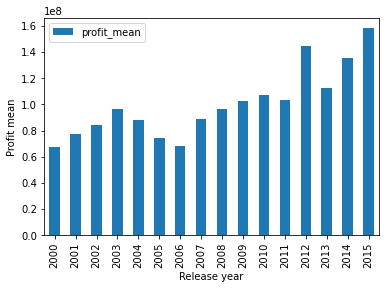

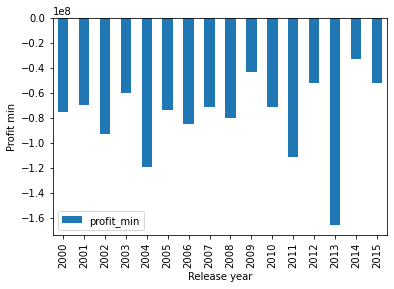

In [652]:
# Plot data
data_10 = data.copy()
data_10_mean = data_10.groupby(['release_year'])['profit'].mean()
data_10_min = data_10.groupby(['release_year'])['profit'].min()

data_10_mean = data_10_mean.reset_index()
data_10_mean.columns = ['release_year','profit_mean']
data_10_mean.plot(x='release_year', y='profit_mean', xlabel = 'Release year', ylabel='Profit mean', kind='bar') 

data_10_min = data_10_min.reset_index()
data_10_min.columns = ['release_year','profit_min']
data_10_min.plot(x='release_year', y='profit_min', xlabel = 'Release year', ylabel='Profit min', kind='bar') 


# 11. Какого жанра фильмов больше всего?

In [653]:
answers['11'] = 'Drama'

data_11 = data.copy() # Data will be copied for each task separately here and in what follows.
data_11.genres = data_11.genres.str.split('|') # Split data in genres column by using "|" as a delimeter.
# Transform each element of a list-like to a row, replicating index values. Count all genres.
data_11.genres.explode().value_counts().head(5)


# To find ovewrview information we can use: data_11.genres.explode().describe()


Drama        782
Comedy       683
Thriller     596
Action       582
Adventure    415
Name: genres, dtype: int64

<AxesSubplot:>

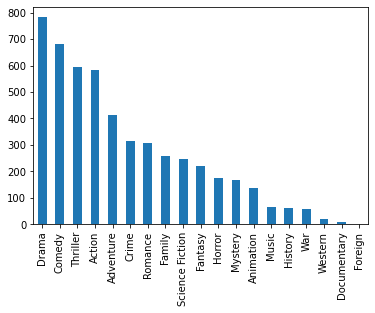

In [654]:
data_11 = data.copy()
data_11.genres = data_11.genres.str.split('|')
data_11.genres.explode().value_counts().plot(kind='bar') # Plot number of movies by genres


ВАРИАНТ 2

In [655]:
data_11_v2 = data.copy()
def collect_genres(): # Define function, which produce list of all genre inputs.
    all_genres = [] # Define list where we will put all genres from data
    for genre in data_11_v2.genres.str.split("|"): # Take each element from genres.
        all_genres.append(genre) # Put each genre into the list.
    all_genres = list(it.chain(*all_genres)) # use chain to make one list: chain('ABC', 'DEF') --> A B C D E F
    return all_genres # return list of all genre inputs in the data

def number_unique():
    frequency = {} # Define dictionary to include how many times unique elements appear in the list of genres.
    unique = list(set(collect_genres())) # Take only unique elements from the list of genres: Crime, Action, etc.
    for item in unique: # Run over unique genres.
        frequency[item] = by_genres().count(item) # Count how many times unique genre appears in the list of genres.
    print("Frequency of genres: ", sorted(frequency.items(), key=lambda x: x[1],reverse=True)) # Sort genres.

number_unique()


Frequency of genres:  [('Drama', 782), ('Comedy', 683), ('Thriller', 596), ('Action', 582), ('Adventure', 415), ('Crime', 315), ('Romance', 308), ('Family', 260), ('Science Fiction', 248), ('Fantasy', 222), ('Horror', 176), ('Mystery', 168), ('Animation', 139), ('Music', 64), ('History', 62), ('War', 58), ('Western', 19), ('Documentary', 8), ('Foreign', 2)]


In [656]:
data_11_v2b = data.copy()
data_11_v2b.genres = data_11_v2b.genres.str.split('|')
data_11_v2b_genres = list(data_11_v4.genres.explode())

def number_unique():
    frequency = {} # Define dictionary to include how many times unique elements appear in the list of genres.
    unique = list(set(data_11_v2b_genres)) # Take only unique elements from the list of genres: Crime, Action, etc.
    for item in unique: # Run over unique genres.
        frequency[item] = by_genres().count(item) # Count how many times unique genre appears in the list of genres.
    print("Frequency of genres: ", sorted(frequency.items(), key=lambda x: x[1],reverse=True)) # Sort genres.

number_unique()

Frequency of genres:  [('Drama', 782), ('Comedy', 683), ('Thriller', 596), ('Action', 582), ('Adventure', 415), ('Crime', 315), ('Romance', 308), ('Family', 260), ('Science Fiction', 248), ('Fantasy', 222), ('Horror', 176), ('Mystery', 168), ('Animation', 139), ('Music', 64), ('History', 62), ('War', 58), ('Western', 19), ('Documentary', 8), ('Foreign', 2)]


# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [657]:
answers['12'] = 'Drama'

data_12 = data[data.profit > 0].copy() # Take value with positive profit.
data_12.genres = data_12.genres.str.split('|') # Transform string into list in genres.
data_12_genres = data_12.genres.explode() # Apply explode to the genres column replicating index values.
data_12_genres.value_counts().head(3) # Count number of different genres.


Drama       560
Comedy      551
Thriller    446
Name: genres, dtype: int64

<AxesSubplot:>

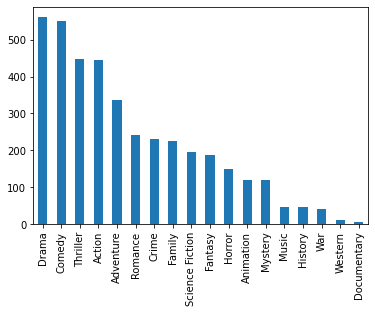

In [658]:
data_12_genres.value_counts().plot(kind='bar')


# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [659]:
answers['13'] = 'Peter Jackson'

data_13 = data.copy() 
data_13['director'] = data_13['director'].str.split('|')
data_13 = data_13.explode('director')
# Group directors by sum revenue they produce.
data_13.groupby(['director'])['revenue'].sum().sort_values(ascending=False).head(3) 


director
Peter Jackson        6490593685
Christopher Nolan    4167548502
David Yates          4154295625
Name: revenue, dtype: int64

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [660]:
answers['14'] = 'Robert Rodriguez'

data_14 = data.copy() 
data_14['genres'] = data_14['genres'].str.split('|')
data_14['director'] = data_14['director'].str.split('|')
data_14 = data_14.explode('genres')
data_14 = data_14.explode('director')
data_14_action = data_14.query('genres == "Action"') # Take Action from the genres column.
data_14_action['director'].value_counts().head(4) # Count director inputs for this sub dataset


Robert Rodriguez      9
Michael Bay           7
Paul W.S. Anderson    7
Ridley Scott          6
Name: director, dtype: int64

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [661]:
answers['15'] = 'Chris Hemsworth'

data_15 = data.copy() 
data_15 = data_15[data_15.release_year == 2012].copy() # Consider movies from 2012 only.
data_15['cast'] = data_15['cast'].str.split('|') 
data_15 = data_15.explode('cast')
# Consider cast with max sum revenue.
data_15.groupby('cast').revenue.sum().sort_values(ascending=False).head(10)


cast
Chris Hemsworth       2027450773
Denis Leary           1629460639
Anne Hathaway         1522851057
Robert Downey Jr.     1519557910
Mark Ruffalo          1519557910
Chris Evans           1519557910
Scarlett Johansson    1519557910
Ralph Fiennes         1409561013
Sacha Baron Cohen     1368110577
Kristen Stewart       1234384318
Name: revenue, dtype: int64

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [662]:
answers['16'] = 'Matt Damon'

data_16 = data[data.budget > data.budget.mean()].copy() # Upload data with budget higher than the mean value only.
data_16['cast'] = data_16['cast'].str.split('|')
pd.Series(data_16['cast'].sum()).value_counts().head(4) # Sum over all cast involved in such data.


Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Samuel L. Jackson    15
dtype: int64

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [663]:
answers['17'] = 'Action, 17 times'

data_17 = data.copy()
data_17['genres'] = data_17['genres'].str.split('|')
data_17['cast'] = data_17['cast'].str.split('|')
data_17 = data_17.explode('genres')
data_17 = data_17.explode('cast')
# Pick up Nicolas Cage from the cast and group his contribution by genres.
data_17.query('cast == "Nicolas Cage"').value_counts(['genres']).head(5)


genres  
Action      17
Thriller    15
Drama       12
Crime       10
Fantasy      8
dtype: int64

<AxesSubplot:xlabel='Genres', ylabel='Number'>

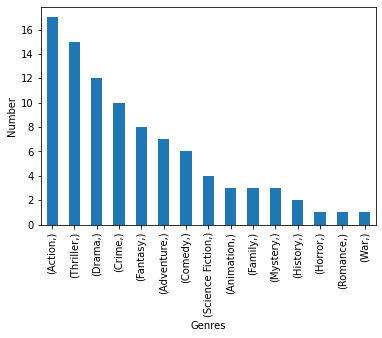

In [664]:
data_17.query('cast == "Nicolas Cage"').value_counts(['genres']).plot(xlabel = 'Genres', ylabel='Number', kind='bar')


# 18. Самый убыточный фильм от Paramount Pictures

In [665]:
answers['18'] = 'K-19: The Widowmaker (tt0267626)'

data_18 = data.copy()
data_18['production_companies'] = data_18['production_companies'].str.split('|')
data_18 = data_18.explode('production_companies')
# Pick up Paramount Pictures from the production_companies and group it contribution by profit.
data_18[data_18.production_companies == 'Paramount Pictures'].groupby(['profit']).min().head(2)


,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
profit,,,,,,,,,,,,,,
-64831034,tt0267626,100000000,35168966,K-19: The Widowmaker,Harrison Ford|Liam Neeson|Peter Sarsgaard|Joss...,Kathryn Bigelow,Fate has found its hero.,When Russia's first nuclear submarine malfunct...,138,Thriller|Drama|History,Paramount Pictures,2002-07-19,6.0,2002
-60519261,tt0300556,80000000,19480739,Timeline,Paul Walker|Frances O'Connor|Gerard Butler|Bil...,Richard Donner,They had to travel into the past to save the f...,A group of archaeological students become trap...,116,Action|Adventure|Science Fiction,Paramount Pictures,2003-11-26,5.1,2003


# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [666]:
answers['19'] = '2015'
# Group release_year by sum revenue.
data.groupby('release_year').revenue.sum().sort_values(ascending = False).head(3)


release_year
2015    25449202382
2014    23405862953
2013    23213799791
Name: revenue, dtype: int64

<AxesSubplot:xlabel='Release year', ylabel='Revenue max'>

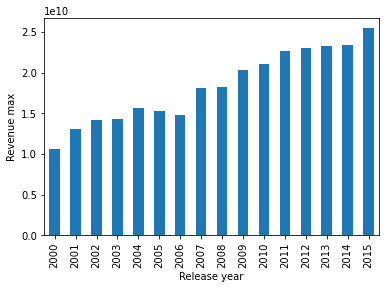

In [667]:
data.groupby('release_year').revenue.sum().plot(xlabel = 'Release year', ylabel='Revenue max', kind='bar')


# 20. Какой самый прибыльный год для студии Warner Bros?

In [668]:
answers['20'] = '2014'

data_20 = data.copy()
data_20['production_companies'] = data_20['production_companies'].str.split('|')
data_20 = data_20.explode('production_companies')

# Take production_companies which contains Warner Bros.
data_20_wb = data_20[data_20['production_companies'].str.contains('Warner Bros')]

# Group release_year by sum profit.
data_20_wb.groupby('release_year').profit.sum().sort_values(ascending=False).head(4)


release_year
2014    2292949646
2007    2201675217
2008    2134595031
2010    1974712985
Name: profit, dtype: int64

<AxesSubplot:xlabel='Release year', ylabel='Profit'>

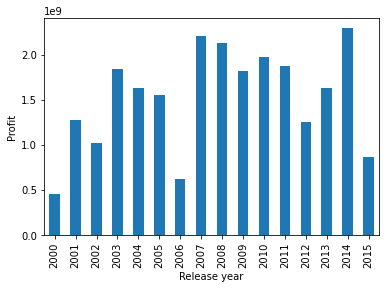

In [669]:
data_20_wb.groupby('release_year').profit.sum().plot(xlabel = 'Release year', ylabel='Profit', kind='bar')


# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [670]:
answers['21'] = 'September'

data_21 = data.copy()
data_21['month'] = pd.DatetimeIndex(data_21['release_date']).month # Make month column.
data_21['month'].value_counts() # Count how many inputs there are in the data for each month.


9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Number of mivies'>

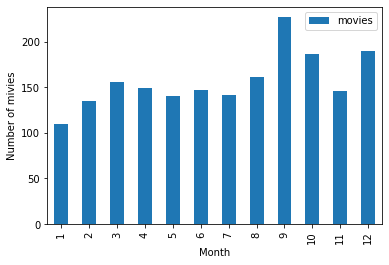

In [671]:
# Plot data.
small_data_21 = data_21['month'].value_counts().sort_index(ascending=True)
small_data_21 = small_data_21.reset_index()
small_data_21.columns = ['month','movies']
small_data_21.plot(x='month', y='movies', xlabel = 'Month', ylabel ='Number of mivies' , kind='bar')


# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [672]:
answers['22'] = '450'
data_22 = data.copy()
data_22['month'] = pd.DatetimeIndex(data_22['release_date']).month # Make month column.
data_22.month.apply(lambda x: 6<=x<=8).sum() # Find total inputs for three months.


450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [673]:
answers['23'] = 'Peter Jackson'

data_23 = data.copy()
data_23['director'] = data_23['director'].str.split('|')
data_23 = data_23.explode('director')
data_23['month'] = pd.DatetimeIndex(data_23['release_date']).month

# Define data according to "winter" (December, January, February) months.
data_23_winter = data_23.query('month in [12,1,2]')
# Group directors by the number of inputs.
data_23_winter.groupby(['director'])['month'].sum().sort_values(ascending=False).head(3)


director
Peter Jackson        84
Clint Eastwood       61
Steven Soderbergh    51
Name: month, dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [674]:
answers['24'] = 'Four By Two Productions'

data_24 = data.copy()

# New column title_length with the length of the input in original_title.
data_24['title_length'] = data_24['original_title'].apply(str).map(len) 

data_24['production_companies'] = data_24['production_companies'].str.split('|')
data_24 = data_24.explode('production_companies')

# Group production_companies by the maximum value in title_length.
data_24.groupby(['production_companies'])['title_length'].max().sort_values(ascending =False).head(3)


production_companies
Twentieth Century Fox Film Corporation    83
Four By Two Productions                   83
Walt Disney                               62
Name: title_length, dtype: int64

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [675]:
answers['25'] = 'Midnight Picture Show'

data_25 = data.copy()

# New column overview_words_length with the number of words in moview overview.
data_25['overview_words_length'] = data_25.overview.map(lambda x: len(x.split(' ')))

data_25['production_companies'] = data_25['production_companies'].str.split('|')
data_25 = data_25.explode('production_companies')

# Group production_companies by value in overview_words_length.
data_25.groupby(['production_companies'])['overview_words_length'].mean().sort_values(ascending =False)


production_companies
Midnight Picture Show                    175.0
Heineken Branded Entertainment           161.0
Room 9 Entertainment                     161.0
98 MPH Productions                       159.0
Brookwell-McNamara Entertainment         156.0
                                         ...  
Henceforth                                13.0
Our Stories Films                         13.0
London Boulevard                          13.0
Motion Picture Corporation of America     11.0
Empire Pictures                           11.0
Name: overview_words_length, Length: 1771, dtype: float64

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [676]:
answers['26'] = '9. Inside Out (tt2096673), 599. The Dark Knight(tt0468569), 1191. 12 Years a Slave (tt2024544)'

# Upload part of the data sorting by vote_average.
data_26 = data.sort_values('vote_average')[['imdb_id','original_title', 'vote_average']].copy()

# Sort data by vote_average within .quantile(0.99).
data_26[data_26.vote_average >= data_26.vote_average.quantile(0.99)].sort_values(['vote_average'],ascending = False)


,imdb_id,original_title,vote_average
599,tt0468569,The Dark Knight,8.1
125,tt2084970,The Imitation Game,8.0
9,tt2096673,Inside Out,8.0
118,tt0816692,Interstellar,8.0
34,tt3170832,Room,8.0
872,tt0253474,The Pianist,7.9
1081,tt0167260,The Lord of the Rings: The Return of the King,7.9
138,tt2278388,The Grand Budapest Hotel,7.9
1183,tt0993846,The Wolf of Wall Street,7.9
370,tt1375666,Inception,7.9


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [677]:
answers['27'] = '(Daniel Radcliffe, Rupert Grint)'

data_27 = data.copy()
cast = [] # Define list for cast.
for item in data_27.cast: # Run over the data in 'cast' column.
    data_27_cast = sorted(item.split('|')) # Split the cast in each line and sort them.
    cast.extend(list(it.combinations(data_27_cast, 2))) # Pick up unique combination of 2 casts and add to cast[].
pd.Series(cast).value_counts().head(5) # Make series of cast and count.


(Emma Watson, Rupert Grint)            8
(Daniel Radcliffe, Rupert Grint)       8
(Daniel Radcliffe, Emma Watson)        8
(Helena Bonham Carter, Johnny Depp)    6
(Ben Stiller, Owen Wilson)             6
dtype: int64

ВАРИАНТ 2

In [678]:
data_27_v2 = data.copy()

cast_v2 = [] # Define list for cast.
for item in data_27_v2.cast: # Run over the data in 'cast' column.
    data_27_cast_v2 = sorted(item.split('|')) # Split the cast in each line and sort them.
    cast_v2 = cast_v2 + list(it.combinations(data_27_cast_v2, 2)) # Pick up unique combination of 2 casts and add to cast[].
pd.Series(cast_v2).value_counts().head(5) # Make series of cast and count.


(Emma Watson, Rupert Grint)            8
(Daniel Radcliffe, Rupert Grint)       8
(Daniel Radcliffe, Emma Watson)        8
(Helena Bonham Carter, Johnny Depp)    6
(Ben Stiller, Owen Wilson)             6
dtype: int64

# Submission

In [679]:
# Check all answers.
answers

{'1': '723. Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': '1157. Gods and Generals (tt0279111)',
 '3': '768. Winnie the Pooh (tt1449283)',
 '4': '110',
 '5': '107',
 '6': '239. Avatar (tt0499549)',
 '7': '1245. The Lone Ranger (tt1210819)',
 '8': '1478',
 '9': '599. The Dark Knight (tt0468569)',
 '10': '1245. The Lone Ranger (tt1210819)',
 '11': 'Drama',
 '12': 'Drama',
 '13': 'Peter Jackson',
 '14': 'Robert Rodriguez',
 '15': 'Chris Hemsworth',
 '16': 'Matt Damon',
 '17': 'Action, 17 times',
 '18': 'K-19: The Widowmaker (tt0267626)',
 '19': '2015',
 '20': '2014',
 '21': 'September',
 '22': '450',
 '23': 'Peter Jackson',
 '24': 'Four By Two Productions',
 '25': 'Midnight Picture Show',
 '26': '9. Inside Out (tt2096673), 599. The Dark Knight(tt0468569), 1191. 12 Years a Slave (tt2024544)',
 '27': '(Daniel Radcliffe, Rupert Grint)'}

In [680]:
# Check the length of answers
len(answers)

27